# Computer Visions
* Object Classification
* Object Detection

`Architecture of CNN (Multiclass Image Classficaiton Problems)`

## Computer Vision Input and Outputs

`Multiclassficaiton Problem Images`

input => (W,H,C) => Tensors Pytorch (Numerical Encoding)=> ML Algo => Output => Predictions (Probabilities)

`[batch_size, width, height, channels]` => `[None, 224, 224, 3] Or [32, 224, 224, 3]`
`Output Shape (k,1)` => `[0.80,0.1,0.1]`

* NHWC => Colour Channels Last
* NCHW => Colour Channels first


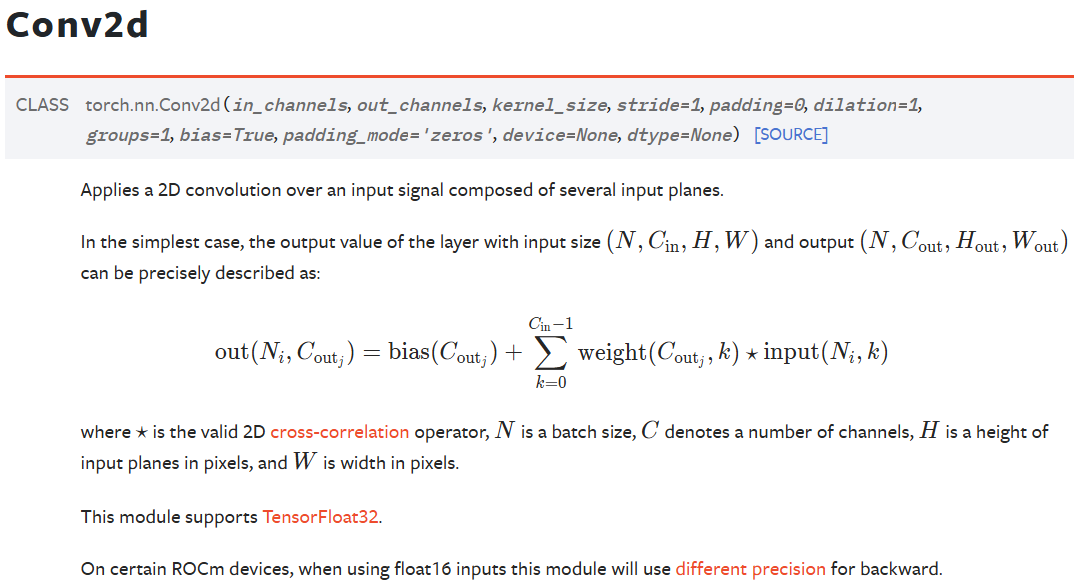

In [317]:
# pytorch
import torch
from torch import nn

# torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # convert pil image or numpy.ndarray to tensors

# matplotlib
import matplotlib.pyplot as plt

In [318]:
print(torch.__version__)
print(torchvision.__version__)


2.5.1+cpu
0.20.1+cpu


# 1) Getting Datasets

* Fashion MNIST (Clothing datasets)

`1) Download Datasets (with transforms)`

`2) Visulaize Datasets (image or tensors)`

`1) Prepare Datasets (Data Loader)`

`1) Download Datasets`


### 1) Downlaod datsets

In [319]:
# setup tartining data
from torchvision import datasets

train_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor(), target_transform=None)

test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor(), target_transform=None)

In [320]:
len(train_data), len(test_data)

(60000, 10000)

In [321]:
# first training example
image, label = train_data[1]
# image, label
print(label)

0


In [322]:
class_names = train_data.classes


In [323]:
class_to_idx = train_data.class_to_idx
print(class_to_idx, class_names)

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9} ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [324]:
# to get all the tragers
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [325]:
image.shape
# label.size  #no shape for this just a number

torch.Size([1, 28, 28])

In [326]:
print(f"Image Shape : {image.shape} => target : {class_names[label]}")


Image Shape : torch.Size([1, 28, 28]) => target : T-shirt/top


### 2) Visualize the datasets

In [327]:
torchvision.transforms.functional.to_pil_image(image)
# comvert tensors to pil image (Python Imaging Library)

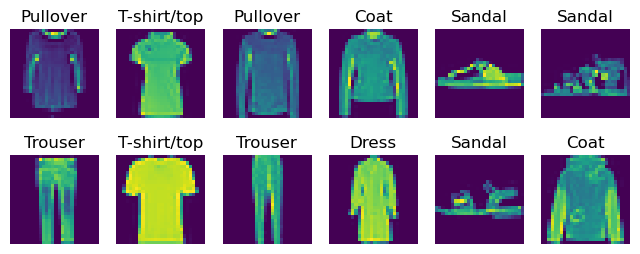

In [328]:
# Create a figure with 10 subplots in a single row
fig = plt.figure(figsize=(8,3))
rows, cols = 2, 6
for i in range(1, rows * cols + 1):
    random_indx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_indx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze())
    plt.title(class_names[label])
    plt.axis(False)


### 3) Prepare the datsest (dataloader) and visualize one image out of batch size

* Right now our datasets in the form of pytorch datsets. `DataLoader` converts our datsets into python iterables 
* More specifically we want to turn our data into mini-batches (why ?)
    * to make computationally efficient (32 or 64 images at a time)
    * it gives our neural networks to more chaces to update its gradient per epoch


In [329]:
print(train_data, test_data, sep="\n", end="\n")

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [330]:
no_of_batches = len(train_data) / 32
no_of_batches

1875.0

In [331]:
from torch.utils.data import DataLoader

# setup batchsizxe hyper parametrs
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x16c9f9e3c50>,
 <torch.utils.data.dataloader.DataLoader at 0x16c9ff2aed0>)

In [332]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [333]:
# check out whats inside the datalaoder
train_features_batch, train_labels_batch = next(iter(train_dataloader))
 
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28])

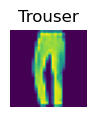

In [334]:
# single images in batch
random_indx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_indx], train_labels_batch[random_indx]
plt.figure(figsize=(1,1))
plt.imshow(img.squeeze())
plt.title(class_names[label])
plt.axis(False)
img.shape

### 3) Build a model

In [335]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [336]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
x.shape, train_features_batch.shape

# flaten the sample
opt = flatten_model(x)
opt.squeeze().shape

torch.Size([784])

In [337]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layerStack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)

        )

    def forward(self, x):
        return self.layerStack(x)



In [338]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape=28*28, hidden_units=16, output_shape=len(class_names))
model_0

FashionMNISTModelV0(
  (layerStack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [339]:
dummy_x = torch.rand([32,1,28,28])
# model_0(dummy_x).shape # 10 logists values

In [340]:
dict(model_0.state_dict()).keys()

dict_keys(['layerStack.1.weight', 'layerStack.1.bias', 'layerStack.2.weight', 'layerStack.2.bias'])

In [341]:
dictModel = dict(model_0.state_dict())
for key in dict(model_0.state_dict()):
    print(key, " => ", dictModel[key].shape)

layerStack.1.weight  =>  torch.Size([16, 784])
layerStack.1.bias  =>  torch.Size([16])
layerStack.2.weight  =>  torch.Size([10, 16])
layerStack.2.bias  =>  torch.Size([10])


### 4) Setup loss function, optimzer and evalutation metrics

* Loss function multiclass classifcation `nn.CrossEntorpyLoss()`
* optimizer - `torch.optim.SGD()`
* evaluation metrics - multiclass classification so use accuracy `torchmetrics.Accuracy()`

In [342]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [343]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr = 0.1)

### 5) Creating a function to time our experiments

* model performance (loss and accuracy values)
* how fast is run

In [344]:
from timeit import default_timer as Timer
from typing import Optional
import torch

def print_train_time(start: float, end: float, device: Optional[torch.device] = None) -> float:
    """Prints and returns the total training time."""
    total_time = end - start
    device_str = device if device else "Unknown Device"
    print(f"Train time on {device_str}: {total_time:.3f} seconds")
    return total_time  # Returning allows for further use


In [345]:
start = Timer()
# Training process here...
end = Timer()

train_time = print_train_time(start, end, device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))


Train time on cpu: 0.000 seconds
